In [1]:
# --- Imports ---
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


In [2]:
def load_data(path, target_col="p_factor"):
    """
    Loads the cleaned dataset and splits into features and target.
    Drops rows with missing values.
    """
    df = pd.read_csv(path, index_col=0)
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Drop rows with NaNs in either X or y
    mask = X.notna().all(axis=1) & y.notna()
    return X[mask], y[mask]


In [3]:
def train_ridge_model(X, y, alphas=None, cv=5):
    """
    Trains Ridge Regression with cross-validation to find the best alpha.
    Returns trained model and R² score.
    """
    if alphas is None:
        alphas = np.logspace(-3, 3, 100)

    model = make_pipeline(
        StandardScaler(),
        RidgeCV(alphas=alphas, cv=cv)
    )
    model.fit(X, y)
    score = model.score(X, y)
    return model, score


In [4]:
def show_top_features(model, X, top_n=10):
    """
    Prints and plots top features by absolute coefficient magnitude.
    """
    coefs = model.named_steps['ridgecv'].coef_
    coef_df = pd.Series(coefs, index=X.columns).sort_values(key=abs, ascending=False)
    
    print(f"\nTop {top_n} contributing features:")
    print(coef_df.head(top_n))

    coef_df.head(top_n * 2).plot(kind='barh', figsize=(8, 6), title='Top Ridge Coefficients')
    plt.xlabel("Coefficient Value")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    return coef_df


In [5]:
def run_pipeline(path_to_csv="all_cleaned.csv"):
    X, y = load_data(path_to_csv)
    model, score = train_ridge_model(X, y)
    best_alpha = model.named_steps['ridgecv'].alpha_

    print(f"✅ Ridge Regression complete")
    print(f"Best alpha: {best_alpha:.4f}")
    print(f"R² score on training data: {score:.3f}")
    
    top_features = show_top_features(model, X)
    return model, top_features


✅ Ridge Regression complete
Best alpha: 30.5386
R² score on training data: 0.067

Top 10 contributing features:
aparc.DKTatlas__rh__caudalanteriorcingulateSurfArea    -0.208606
aparc.DKTatlas__lh__insulaSurfArea                      0.167299
aparc.DKTatlas__lh__posteriorcingulateSurfArea          0.142437
aparc.DKTatlas__rh__caudalanteriorcingulateGrayVol     -0.139495
aparc.DKTatlas__lh__rostralanteriorcingulateSurfArea   -0.136067
aparc.DKTatlas__lh__insulaGrayVol                       0.124011
aparc.DKTatlas__rh__posteriorcingulateGrayVol           0.084708
aparc.DKTatlas__rh__insulaSurfArea                     -0.082439
aparc.DKTatlas__rh__isthmuscingulateGrayVol            -0.076588
aparc.DKTatlas__rh__rostralanteriorcingulateSurfArea    0.051614
dtype: float64


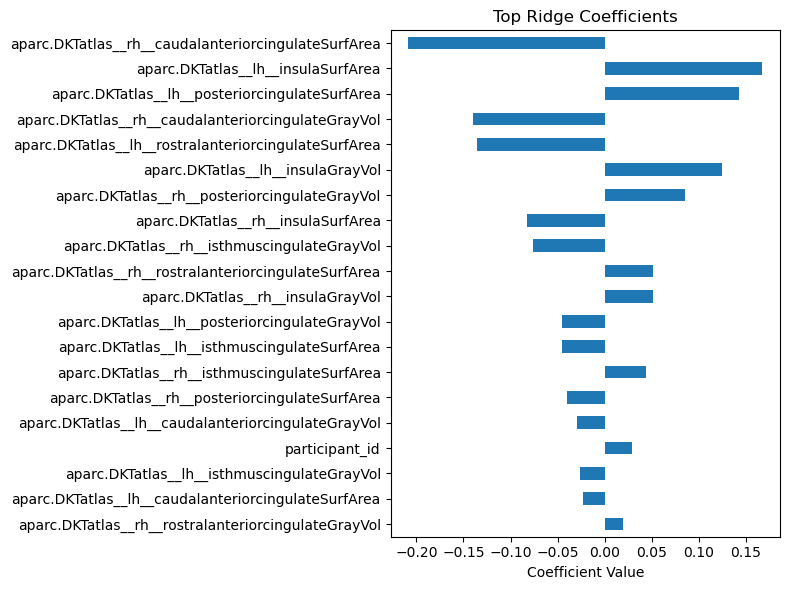

In [6]:
# Run the pipeline
model, top_features = run_pipeline("flattened_data/all_cleaned.csv")
